In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/EEG_dataset/dataset

add_stim.mat		control_stim.mat  d7.mat		    sub-01_task-1_eeg.vmrk
adhd_d5.mat		d1.mat		  first_129_of_d3.mat	    sub-05_task_eeg.eeg
adhd_stim.mat		d2.mat		  last_1840_columnsNew.mat  sub-05_task_eeg.vhdr
adhd_test_data.mat	d3.mat		  last_1840_of_d5.mat	    sub-05_task_eeg.vmrk
adhd_train_data.mat	d4.mat		  readme.txt		    sub_name_stim.mat
chan.mat		d5.mat		  sub-01_task-1_eeg.eeg     transposed_combined_data.mat
combined_adhd_data.mat	d6.mat		  sub-01_task-1_eeg.vhdr    y_stim.mat


In [3]:
import h5py
import numpy as np
from scipy.io import savemat

# Filepaths for the .mat files
filepaths = [
    '/content/drive/MyDrive/EEG_dataset/dataset/d5.mat',
    '/content/drive/MyDrive/EEG_dataset/dataset/d6.mat',
    '/content/drive/MyDrive/EEG_dataset/dataset/d7.mat'
]

# List to store extracted ADHD data
adhd_data_list = []

# Process each file
for idx, filepath in enumerate(filepaths):
    with h5py.File(filepath, 'r') as f:
        # Extract the dataset
        dataset_name = f.keys()
        key = list(dataset_name)[0]  # Assumes there's only one key like 'd5', 'd6', etc.
        data = np.array(f[key])

        # Print the shape of the current file
        print(f"Shape of {key} from {filepath}: {data.shape}")

        # Extract relevant data
        if idx == 0:  # For d5.mat, keep only the last 1840 columns
            adhd_data = data[:, :, -1840:]
            print(f"Shape of adhd_d5: {adhd_data.shape}")
        else:  # For d6.mat and d7.mat, use the entire dataset
            adhd_data = data

        # Append extracted data to the list
        adhd_data_list.append(adhd_data)


# Concatenate all data along the third dimension
combined_adhd_data = np.concatenate(adhd_data_list, axis=2)

# Save the combined data to a new .mat file
output_filepath = '/content/drive/MyDrive/EEG_dataset/dataset/combined_adhd_data.mat'
savemat(output_filepath, {'combined_adhd_data': combined_adhd_data})

print(f"Combined data saved to {output_filepath} with shape {combined_adhd_data.shape}")


Shape of d5 from /content/drive/MyDrive/EEG_dataset/dataset/d5.mat: (385, 56, 5000)
Shape of adhd_d5: (385, 56, 1840)
Shape of d6 from /content/drive/MyDrive/EEG_dataset/dataset/d6.mat: (385, 56, 5000)
Shape of d7 from /content/drive/MyDrive/EEG_dataset/dataset/d7.mat: (385, 56, 3902)
Combined data saved to /content/drive/MyDrive/EEG_dataset/dataset/combined_adhd_data.mat with shape (385, 56, 10742)


In [4]:
import h5py

# Load the MATLAB file using h5py
file_path = '/content/drive/MyDrive/EEG_dataset/dataset/y_stim.mat'

with h5py.File(file_path, 'r') as f:
    # Inspect the structure of the file
    print(f.keys())  # List all available datasets in the file

    # Access the dataset
    y_stim = f['y_stim'][:]  # Load the 'y_stim' dataset into a NumPy array

    # If the data is transposed, transpose it
    y_stim = y_stim.T  # Ensure correct shape if necessary

# Verify the shape of the dataset
print("y_stim shape:", y_stim.shape)


<KeysViewHDF5 ['y_stim']>
y_stim shape: (33902, 4)


In [5]:
import h5py
import numpy as np
from scipy.io import loadmat, savemat

# Load y_stim.mat file
y_stim_path = '/content/drive/MyDrive/EEG_dataset/dataset/y_stim.mat'
with h5py.File(y_stim_path, 'r') as f:
    # Inspect the structure of the file
    print(f.keys())  # List all available datasets in the file

    # Access the dataset
    y_stim = f['y_stim'][:]  # Load the 'y_stim' dataset into a NumPy array

    # If the data is transposed, transpose it
    y_stim = y_stim.T  # Ensure correct shape if necessary

# Verify the shape of the dataset
print("y_stim shape:", y_stim.shape)

# Columns in y_stim:
# Column 0 = participant number
# Column 1 = control group
# Column 2 = ADD group
# Column 3 = ADHD group

# Separate the rows for each group based on the column data
control_stim = y_stim[y_stim[:, 1] == 1]  # Rows where control column == 1
add_stim = y_stim[y_stim[:, 2] == 1]      # Rows where ADD column == 1
adhd_stim = y_stim[-10742:, :]            # Last 10742 rows for ADHD group

# Print the shapes for verification
print(f"Control group shape: {control_stim.shape}")
print(f"ADD group shape: {add_stim.shape}")
print(f"ADHD group shape: {adhd_stim.shape}")

# Save the separated group data into .mat files
output_dir = '/content/drive/MyDrive/EEG_dataset/dataset/'

savemat(f'{output_dir}control_stim.mat', {'control_stim': control_stim})
savemat(f'{output_dir}add_stim.mat', {'add_stim': add_stim})
savemat(f'{output_dir}adhd_stim.mat', {'adhd_stim': adhd_stim})

print("Files saved successfully!")


<KeysViewHDF5 ['y_stim']>
y_stim shape: (33902, 4)
Control group shape: (10129, 4)
ADD group shape: (13031, 4)
ADHD group shape: (10742, 4)
Files saved successfully!


In [6]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from collections import Counter

# Load adhd_stim.mat
adhd_stim_path = '/content/drive/MyDrive/EEG_dataset/dataset/adhd_stim.mat'
adhd_stim = loadmat(adhd_stim_path)['adhd_stim']

# Load combined_adhd_data.mat
combined_data_path = '/content/drive/MyDrive/EEG_dataset/dataset/combined_adhd_data.mat'
combined_data = loadmat(combined_data_path)['combined_adhd_data']

# Verify the shapes
print(f"Shape of adhd_stim: {adhd_stim.shape}")
print(f"Shape of combined_adhd_data: {combined_data.shape}")

# Extract participant numbers (from first column of adhd_stim)
participant_numbers = adhd_stim[:, 0]

# Count the number of trials per participant
trial_counts = Counter(participant_numbers)

# Display trial counts
print("Trial counts per participant:")
for participant, count in trial_counts.items():
    print(f"Participant {int(participant)}: {count} trials")

# Plot the number of trials per participant
plt.figure(figsize=(12, 6))
plt.bar(trial_counts.keys(), trial_counts.values(), color='blue')
plt.xlabel('Participant Number', fontsize=12)
plt.ylabel('Number of Trials', fontsize=12)
plt.title('Number of Trials per Participant (ADHD Group)', fontsize=14)
plt.xticks(list(trial_counts.keys()), rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Shape of adhd_stim: (10742, 4)
Shape of combined_adhd_data: (385, 56, 10742)
Trial counts per participant:
Participant 1: 257 trials
Participant 2: 279 trials
Participant 3: 46 trials
Participant 4: 259 trials
Participant 5: 205 trials
Participant 6: 262 trials
Participant 7: 214 trials
Participant 8: 262 trials
Participant 9: 261 trials
Participant 10: 265 trials
Participant 11: 285 trials
Participant 12: 255 trials
Participant 13: 213 trials
Participant 14: 238 trials
Participant 15: 168 trials
Participant 16: 125 trials
Participant 17: 239 trials
Participant 18: 195 trials
Participant 19: 286 trials
Participant 20: 197 trials
Participant 21: 234 trials
Participant 22: 203 trials
Participant 23: 223 trials
Participant 24: 265 trials
Participant 25: 255 trials
Participant 26: 226 trials
Participant 27: 264 trials
Participant 28: 259 trials
Participant 29: 260 trials
Participant 30: 290 trials
Participant 31: 287 trials
Participant 32: 229 trials
Participant 33: 172 trials
Participant 

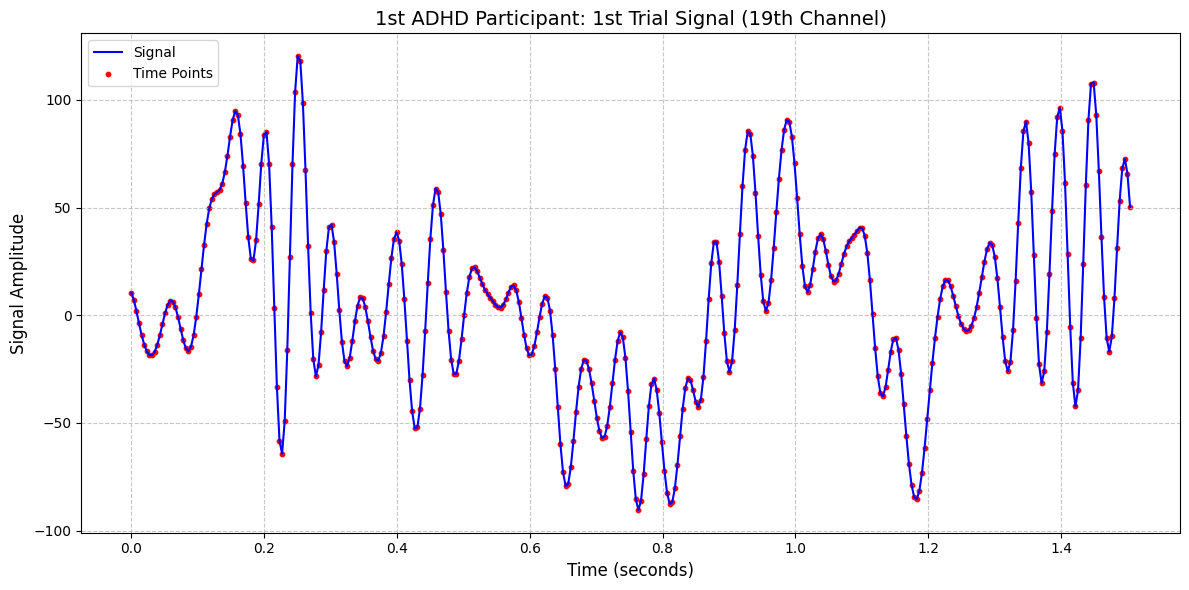

In [7]:
# Define parameters
sampling_rate = 256  # Sampling rate in Hz
time_points = np.linspace(0, 385 / sampling_rate, 385)  # Time in seconds

# Extract trials for the 1st ADHD participant
participant_trials = adhd_stim[:, 0] == 1  # 1st column represents participant number
first_participant_trial_indices = np.where(participant_trials)[0]

# Select the 1st trial for the 1st ADHD participant
first_trial_index = first_participant_trial_indices[0]
first_trial_data = combined_data[:, 18, first_trial_index]  # 19th channel (index 18)

# Plot the signal with time points overlaid
plt.figure(figsize=(12, 6))
plt.plot(time_points, first_trial_data, color='blue', label='Signal')
plt.scatter(time_points, first_trial_data, color='red', s=10, label='Time Points')

# Add labels, legend, and title
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Signal Amplitude', fontsize=12)
plt.title('1st ADHD Participant: 1st Trial Signal (19th Channel)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


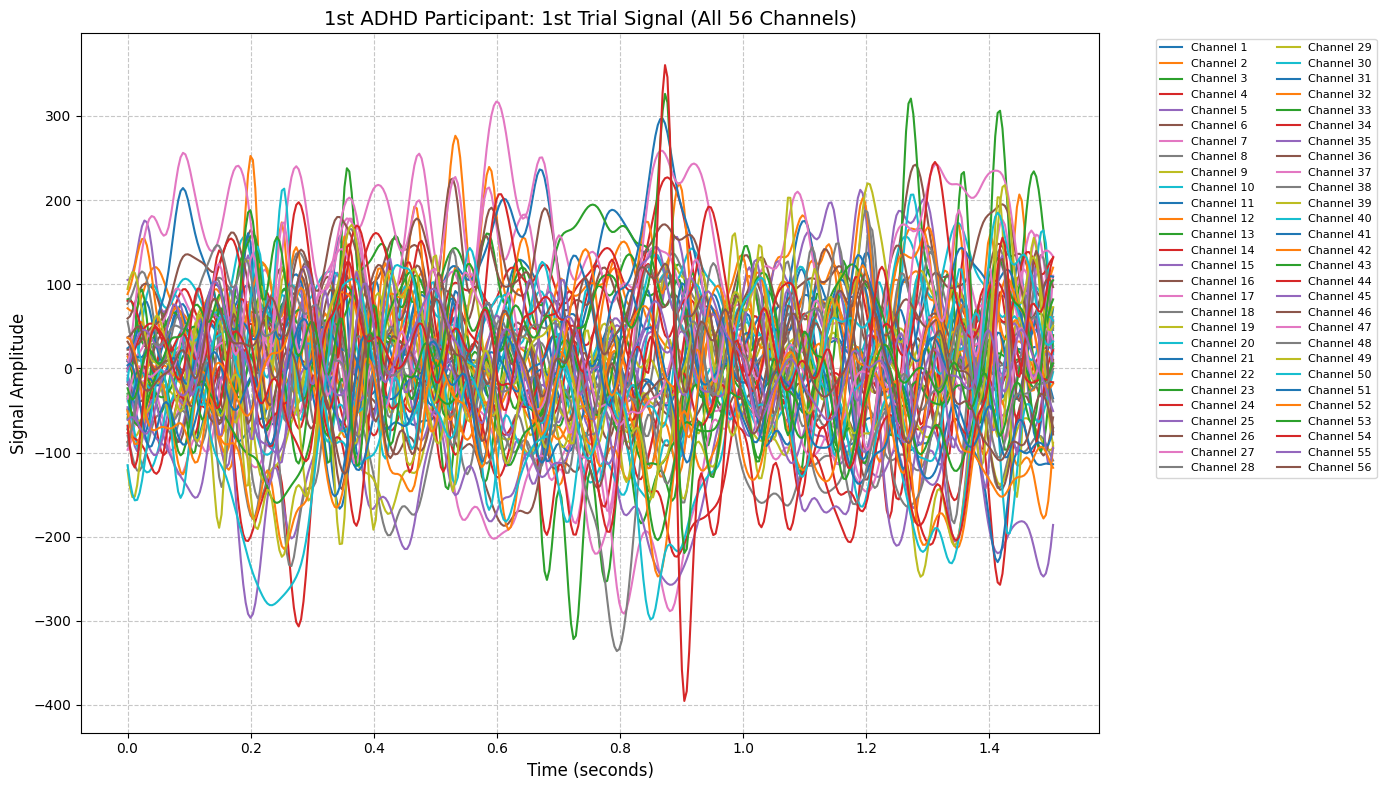

In [8]:
# Define parameters
sampling_rate = 256  # Sampling rate in Hz
time_points = np.linspace(0, 385 / sampling_rate, 385)  # Time in seconds

# Extract trials for the 1st ADHD participant
participant_trials = adhd_stim[:, 0] == 1  # 1st column represents participant number
first_participant_trial_indices = np.where(participant_trials)[0]

# Select the 1st trial for the 1st ADHD participant
first_trial_index = first_participant_trial_indices[0]
first_trial_data_all_channels = combined_data[:, :, first_trial_index]  # All 56 channels

# Plot the signals for all 56 channels
plt.figure(figsize=(14, 8))
for channel in range(56):
    plt.plot(time_points, first_trial_data_all_channels[:, channel], label=f'Channel {channel + 1}')

# Add labels, legend, and title
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Signal Amplitude', fontsize=12)
plt.title('1st ADHD Participant: 1st Trial Signal (All 56 Channels)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, ncol=2)  # Adjust legend
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [9]:
# Define parameters
participant_id = 3  # The 3rd ADHD participant
sampling_rate = 256  # Sampling rate in Hz

# Extract trials for the 3rd ADHD participant
participant_trials = adhd_stim[:, 0] == participant_id  # 1st column represents participant number
participant_trial_indices = np.where(participant_trials)[0]

# Initialize a list to hold the concatenated signals for the 19th channel
combined_signals_19th_channel = []

# Loop through each trial and extract the 19th channel signal, then concatenate
for trial_index in participant_trial_indices:
    trial_data = combined_data[:, 18, trial_index]  # 19th channel (index 18) for this trial
    combined_signals_19th_channel.append(trial_data)  # Append this trial's 19th channel data to the list

# Concatenate all trials to create a single signal for the 19th channel
combined_signals_19th_channel = np.concatenate(combined_signals_19th_channel, axis=0)  # Concatenate along the time axis (rows)

# Now 'combined_signals_19th_channel' contains the concatenated signal for all trials of the 19th channel
print(f"Shape of combined signal for 19th channel (participant {participant_id}): {combined_signals_19th_channel.shape}")

# Create time points for the combined signal (time in seconds)
time_points_combined = np.linspace(0, combined_signals_19th_channel.shape[0] / sampling_rate, combined_signals_19th_channel.shape[0])

# Plot the combined signal for the 19th channel
plt.figure(figsize=(14, 6))
plt.plot(time_points_combined, combined_signals_19th_channel, color='blue')

# Add labels, title
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Signal Amplitude', fontsize=12)
plt.title(f'Combined Signal for 3rd ADHD Participant (19th Channel, All Trials)', fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Shape of combined signal for 19th channel (participant 3): (17710,)


In [10]:
# Define parameters
participant_id = 3  # The 3rd ADHD participant
sampling_rate = 256  # Sampling rate in Hz
num_trials_to_consider = 10  # Number of trials to consider

# Extract trials for the 3rd ADHD participant
participant_trials = adhd_stim[:, 0] == participant_id  # 1st column represents participant number
participant_trial_indices = np.where(participant_trials)[0]

# Select the first 10 trials for the 3rd ADHD participant
first_10_trial_indices = participant_trial_indices[:num_trials_to_consider]

# Initialize a list to hold the concatenated signals for the 19th channel
combined_signals_19th_channel = []

# Loop through each of the first 10 trials and extract the 19th channel signal, then concatenate
for trial_index in first_10_trial_indices:
    trial_data = combined_data[:, 18, trial_index]  # 19th channel (index 18) for this trial
    combined_signals_19th_channel.append(trial_data)  # Append this trial's 19th channel data to the list

# Concatenate all 10 trials to create a single signal for the 19th channel
combined_signals_19th_channel = np.concatenate(combined_signals_19th_channel, axis=0)  # Concatenate along the time axis (rows)

# Now 'combined_signals_19th_channel' contains the concatenated signal for the 19th channel of the first 10 trials
print(f"Shape of combined signal for 19th channel (first 10 trials of participant {participant_id}): {combined_signals_19th_channel.shape}")

# Create time points for the combined signal (time in seconds)
time_points_combined = np.linspace(0, combined_signals_19th_channel.shape[0] / sampling_rate, combined_signals_19th_channel.shape[0])

# Plot the combined signal for the 19th channel
plt.figure(figsize=(14, 6))
plt.plot(time_points_combined, combined_signals_19th_channel, color='blue')

# Add labels, title
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Signal Amplitude', fontsize=12)
plt.title(f'Combined Signal for 3rd ADHD Participant (19th Channel, First 10 Trials)', fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Shape of combined signal for 19th channel (first 10 trials of participant 3): (3850,)


In [11]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 32.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pywt/_functions.py:141: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


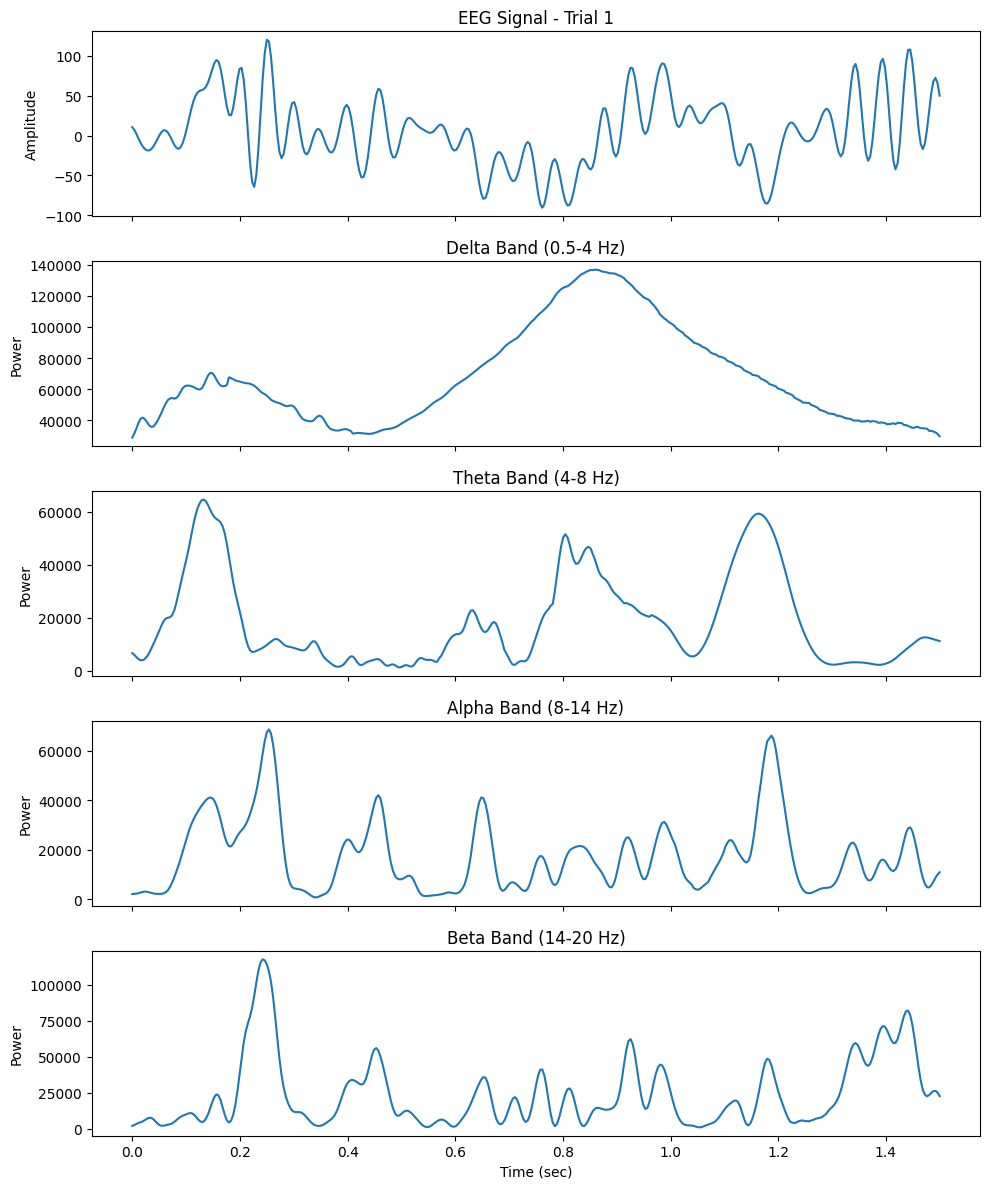

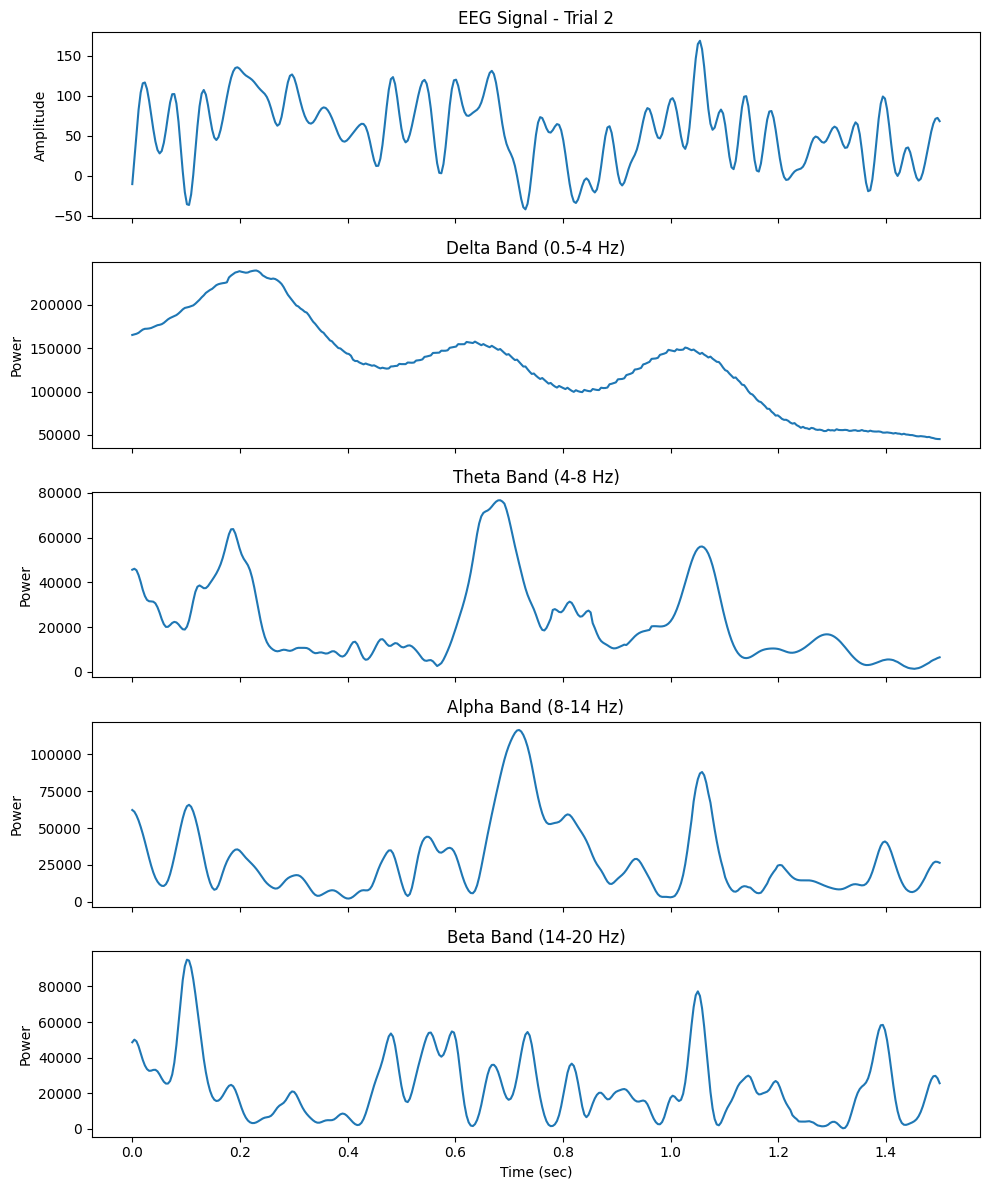

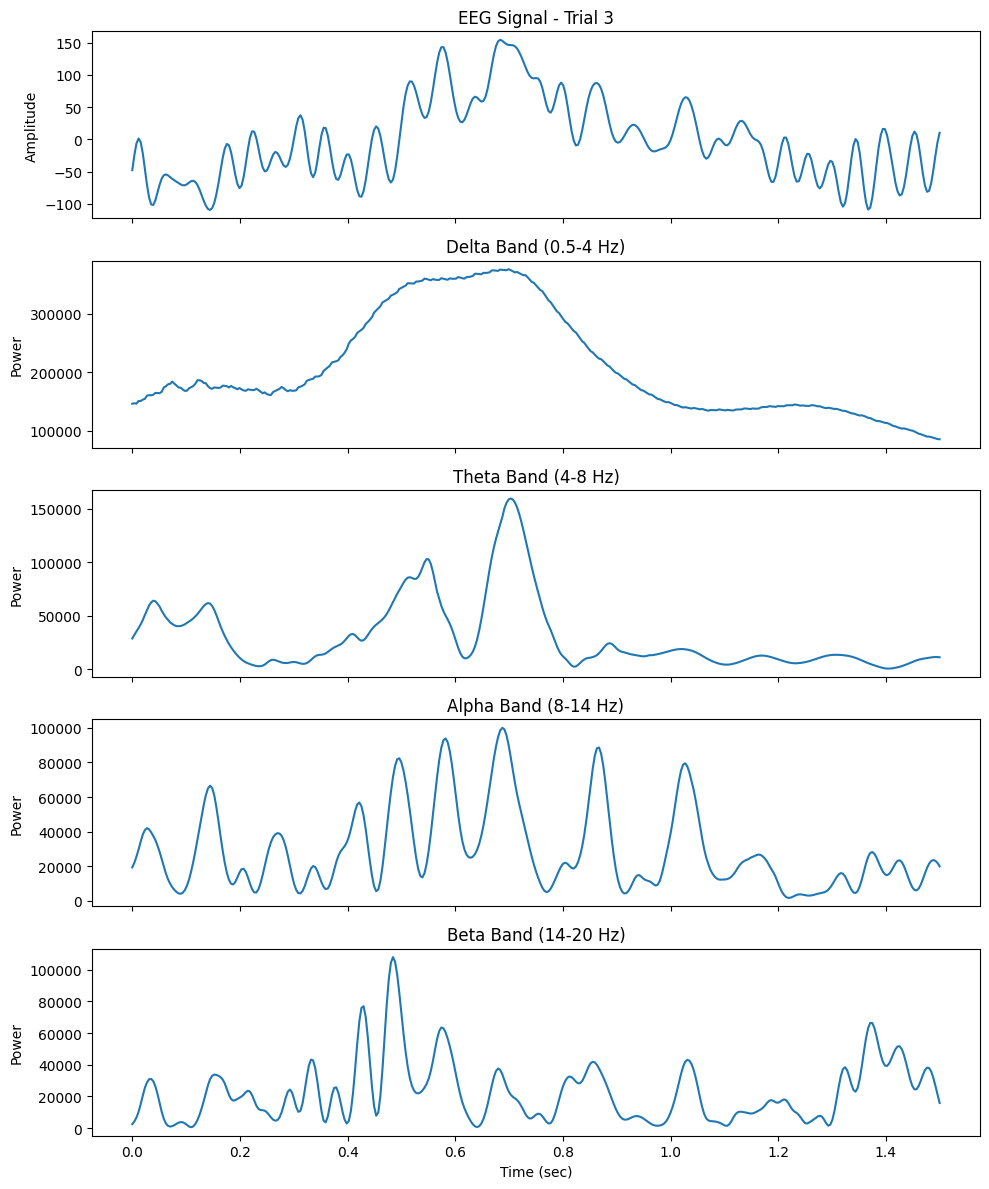

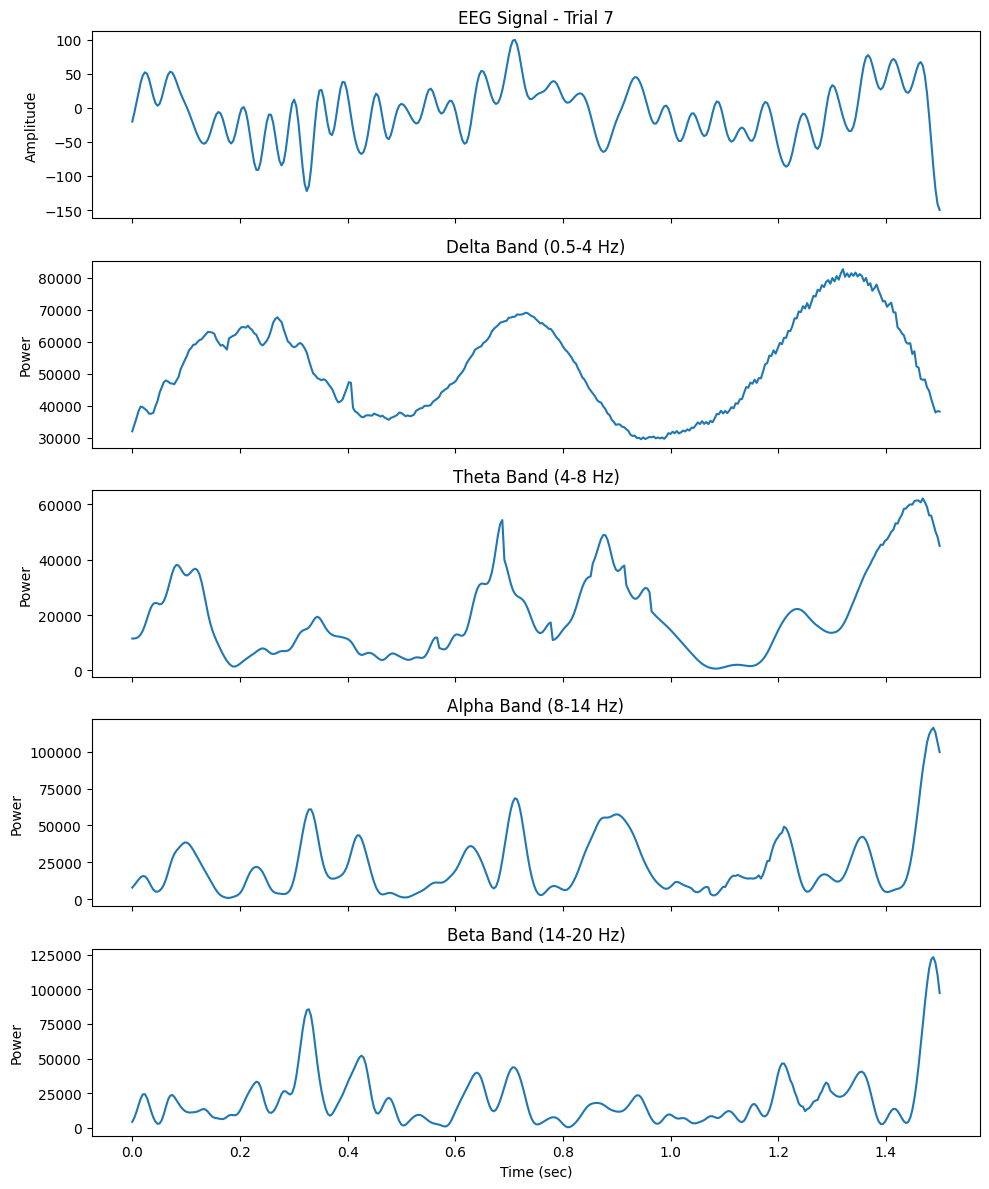

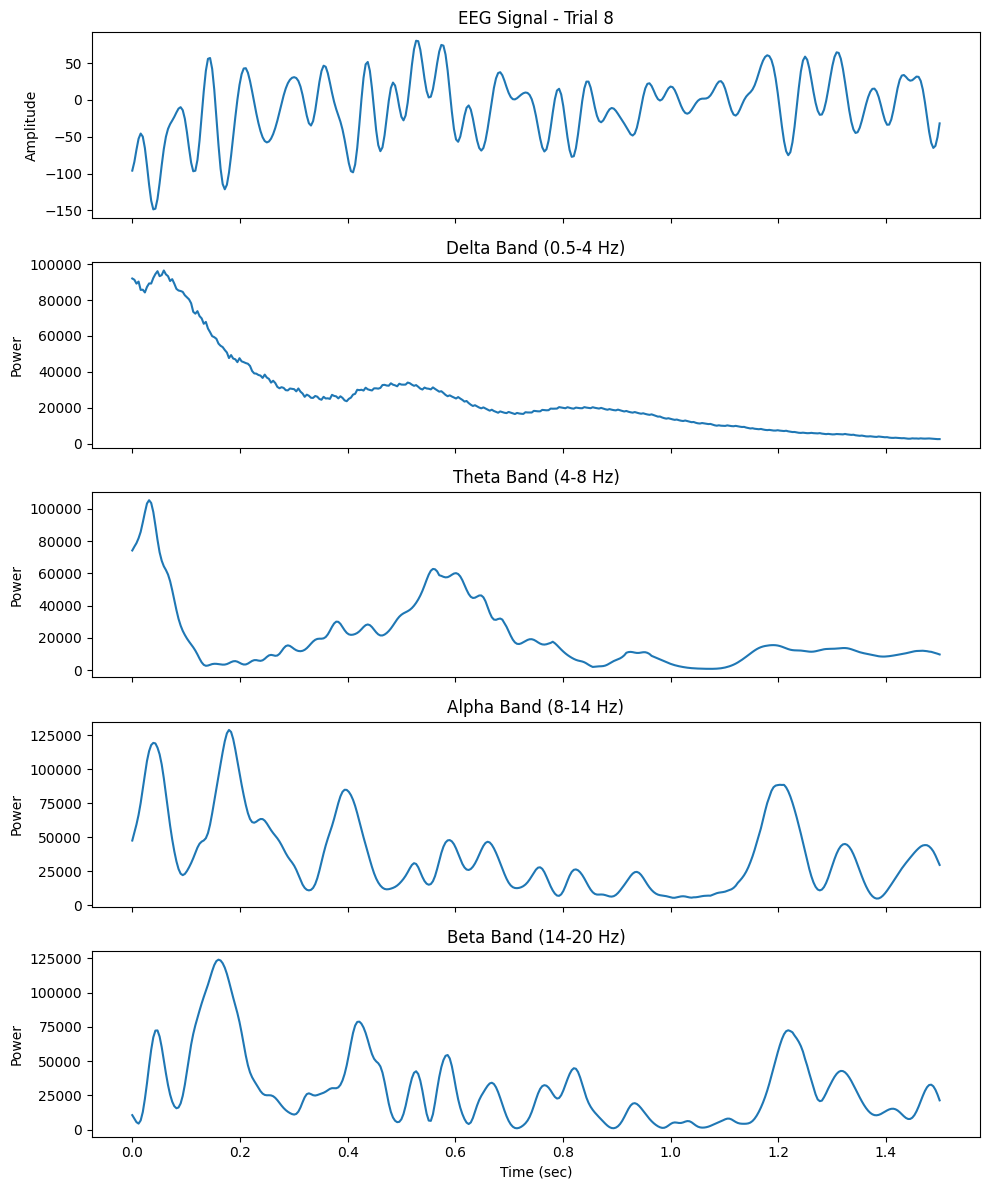

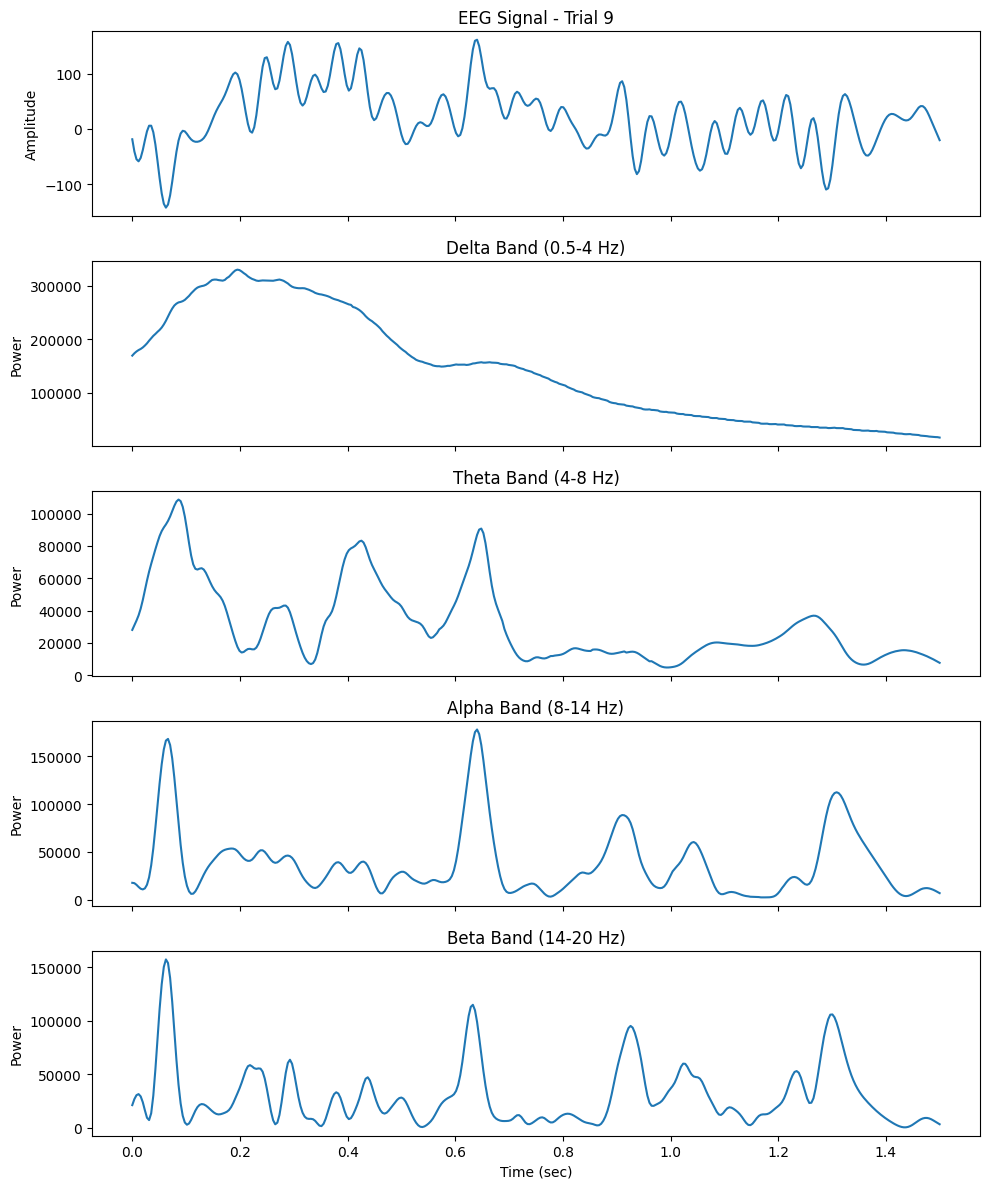

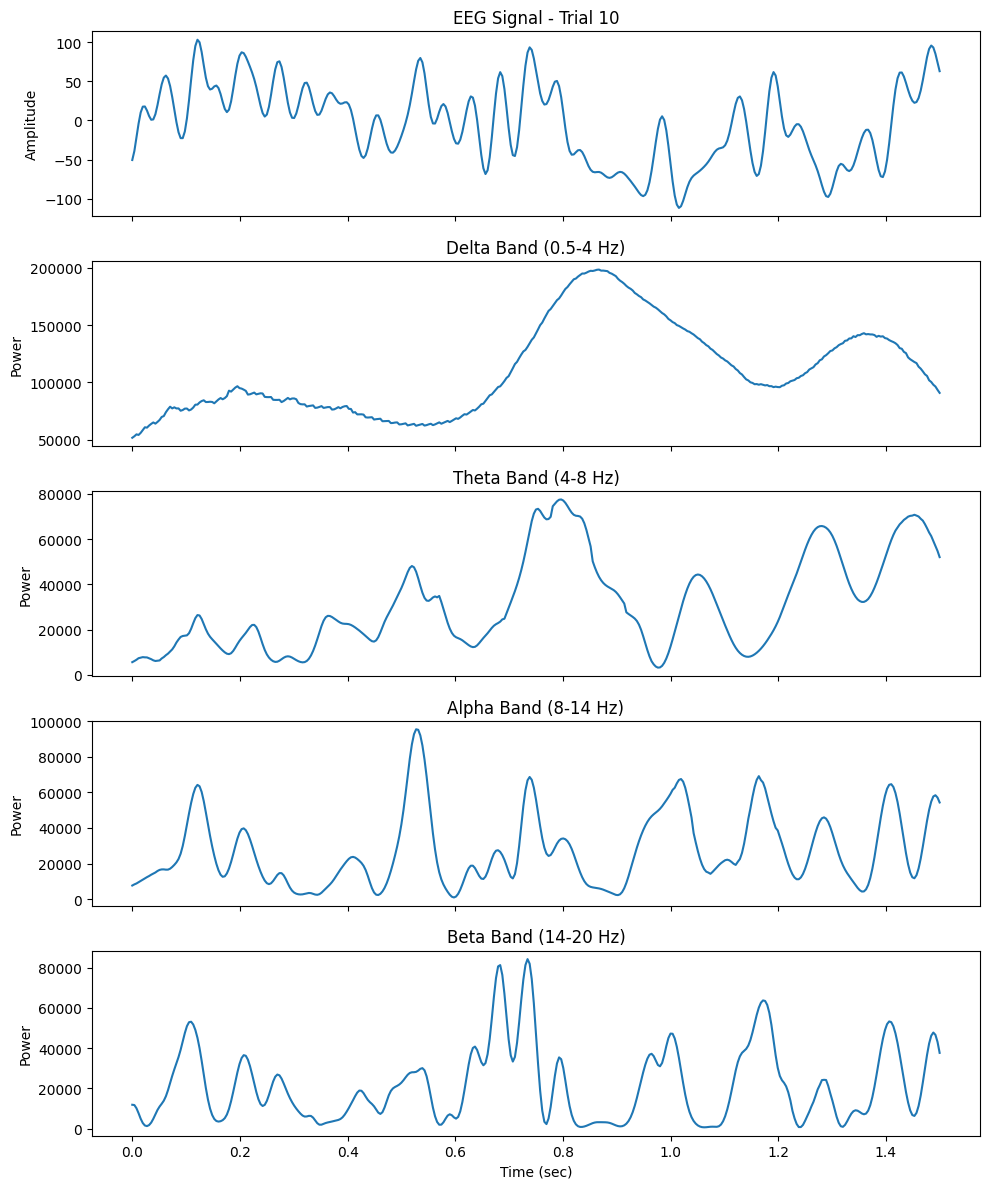

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pywt  # For wavelet transform
from scipy.io import loadmat

# Load combined ADHD data
data_path = '/content/drive/MyDrive/EEG_dataset/dataset/combined_adhd_data.mat'
adhd_data = loadmat(data_path)['combined_adhd_data']

# Load ADHD stim file
stim_path = '/content/drive/MyDrive/EEG_dataset/dataset/adhd_stim.mat'
adhd_stim = loadmat(stim_path)['adhd_stim']

# Select trials of the first participant (19th channel focus)
channel_idx = 18  # Python index for the 19th channel
sampling_rate = 256  # Hz

# Extract data for the first ADHD participant
participant_1_trials = np.where(adhd_stim[:, 0] == 1)[0]
participant_1_data = adhd_data[:, channel_idx, participant_1_trials]  # Shape: (timepoints, trials)

# Define wavelet parameters
wavelet = 'cmor'  # Complex Morlet wavelet
frequencies = np.linspace(0.5, 63, 100)  # Frequency range (Delta to Gamma)
scales = pywt.scale2frequency(wavelet, frequencies) * sampling_rate

# Define frequency bands
bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 14),
    'Beta': (14, 20),
}

# Iterate over all trials for the first participant
for trial_idx, trial_signal in enumerate(participant_1_data.T):  # Loop through trials
    # Apply wavelet transform
    coeffs, freqs = pywt.cwt(trial_signal, scales, wavelet, sampling_period=1 / sampling_rate)
    power = np.abs(coeffs) ** 2  # Power spectrum

    # Plot the original EEG and filtered bands
    fig, axes = plt.subplots(len(bands) + 1, 1, figsize=(10, 12), sharex=True)

    # Plot raw EEG signal
    axes[0].plot(np.arange(len(trial_signal)) / sampling_rate, trial_signal)
    axes[0].set_title(f"EEG Signal - Trial {trial_idx + 1}")
    axes[0].set_ylabel("Amplitude")

    # Plot each band by summing power over relevant frequency indices
    for i, (band_name, (f_min, f_max)) in enumerate(bands.items(), start=1):
        # Find indices for the frequency range of each band
        band_indices = np.where((freqs >= f_min) & (freqs <= f_max))[0]

        # Sum power across frequencies in the selected band
        band_power = power[band_indices, :].sum(axis=0)

        # Plot the filtered signal for the band
        axes[i].plot(np.arange(len(trial_signal)) / sampling_rate, band_power)
        axes[i].set_title(f"{band_name} Band ({f_min}-{f_max} Hz)")
        axes[i].set_ylabel("Power")

    # Label x-axis
    axes[-1].set_xlabel("Time (sec)")

    plt.tight_layout()
    plt.show()

    # Stop after demonstrating for 10 trials
    if trial_idx == 9:
        break


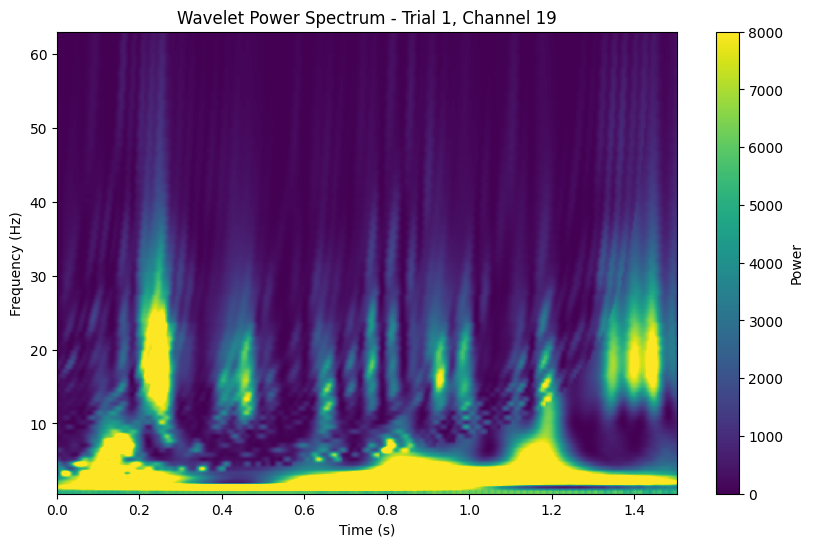

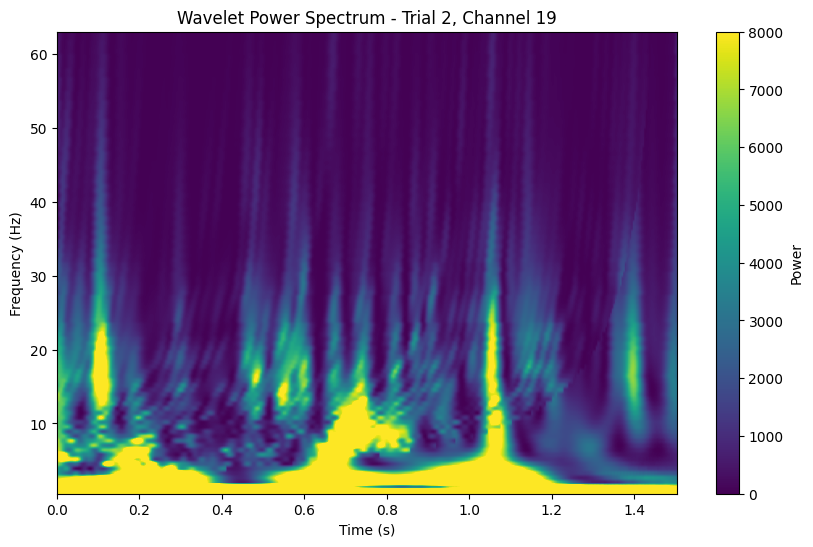

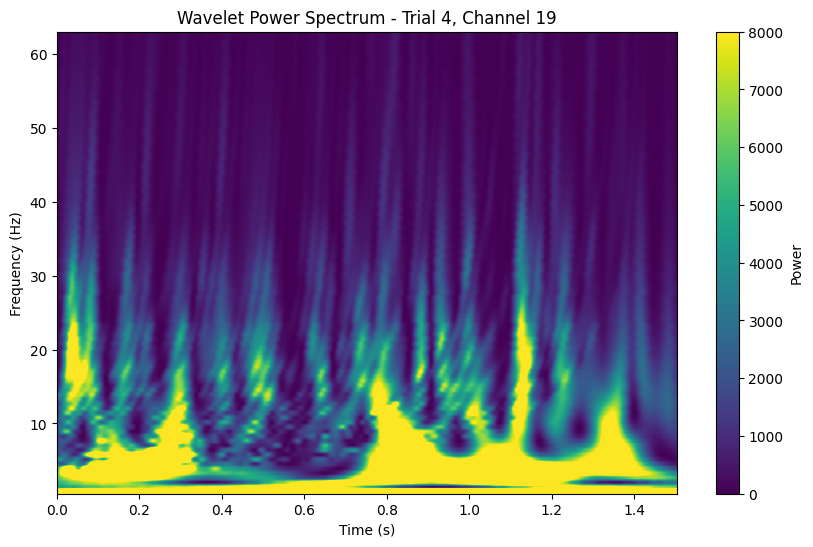

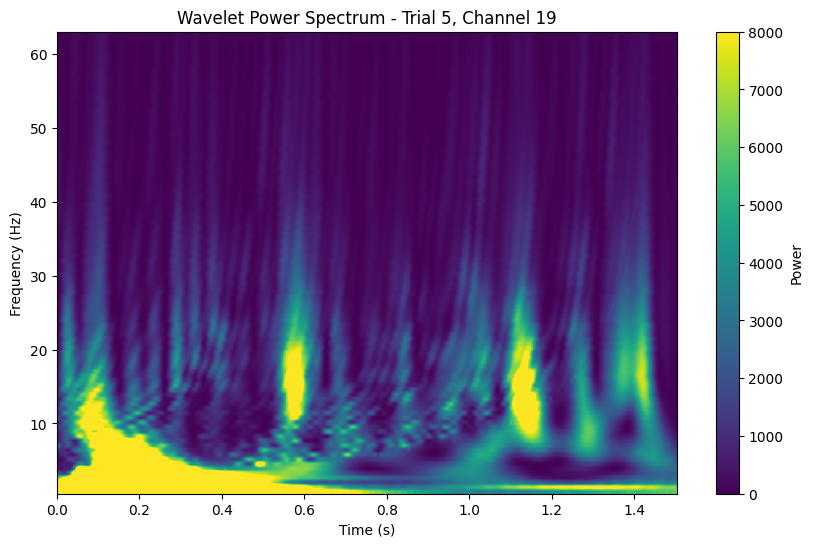

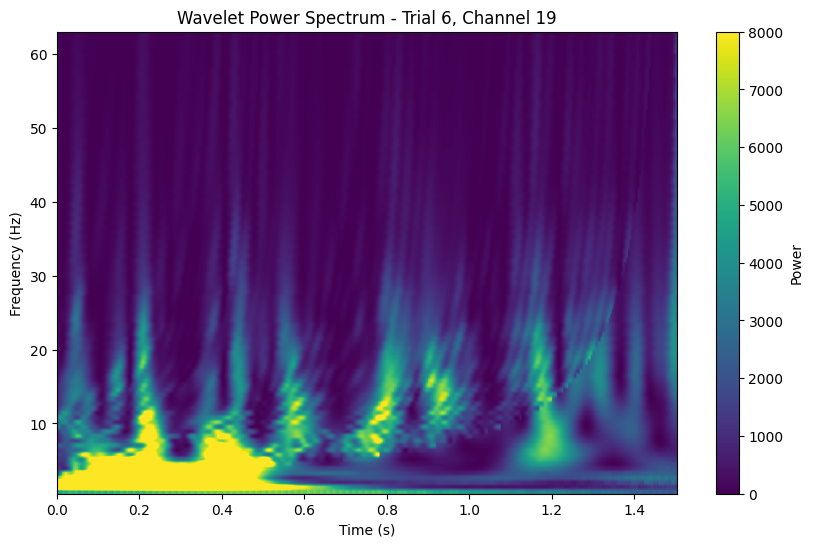

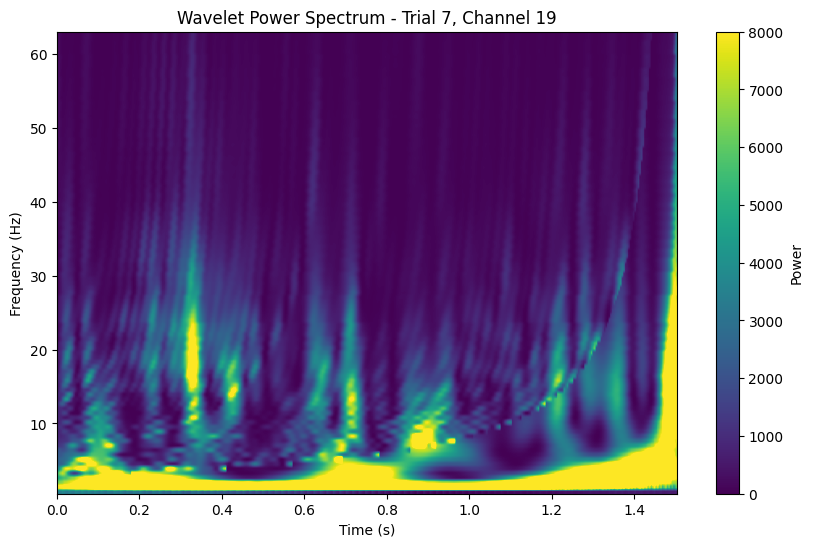

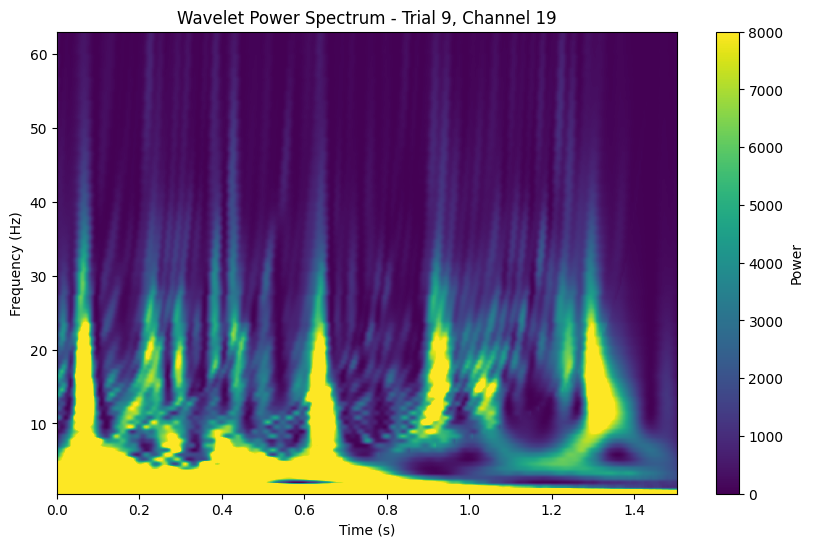

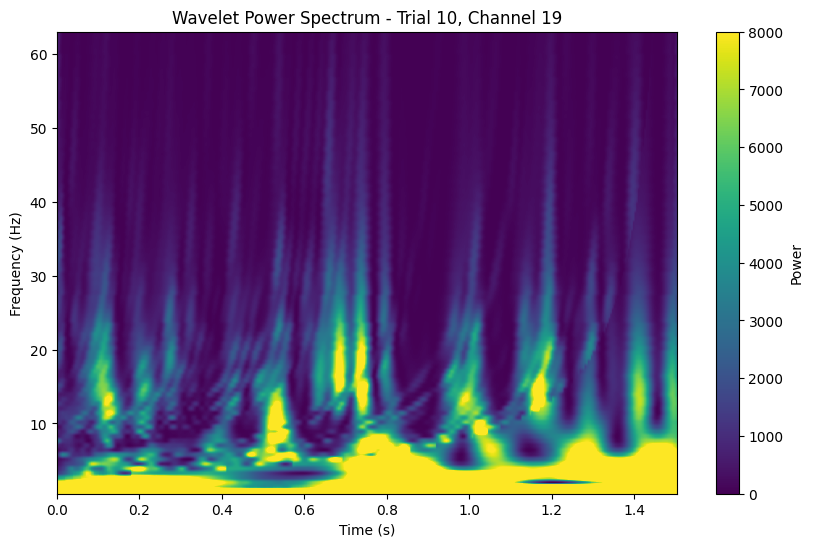

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pywt  # For wavelet transform
from scipy.io import loadmat

# Load combined ADHD data
data_path = '/content/drive/MyDrive/EEG_dataset/dataset/combined_adhd_data.mat'
adhd_data = loadmat(data_path)['combined_adhd_data']

# Load ADHD stim file
stim_path = '/content/drive/MyDrive/EEG_dataset/dataset/adhd_stim.mat'
adhd_stim = loadmat(stim_path)['adhd_stim']

# Select trials of the first participant (19th channel focus)
channel_idx = 18  # Python index for the 19th channel
sampling_rate = 256  # Hz

# Extract data for the first ADHD participant
participant_1_trials = np.where(adhd_stim[:, 0] == 1)[0]
participant_1_data = adhd_data[:, channel_idx, participant_1_trials]  # Shape: (timepoints, trials)

# Define wavelet parameters
wavelet = 'cmor'  # Complex Morlet wavelet
frequencies = np.linspace(0.5, 63, 100)  # Frequency range (Delta to Gamma)
scales = pywt.scale2frequency(wavelet, frequencies) * sampling_rate

# Iterate over the first 10 trials
for trial_idx, trial_signal in enumerate(participant_1_data.T[:10]):  # First 10 trials
    # Apply wavelet transform
    coeffs, freqs = pywt.cwt(trial_signal, scales, wavelet, sampling_period=1 / sampling_rate)
    power = np.abs(coeffs) ** 2  # Power spectrum

    # Plot power spectrogram with time points on the x-axis
    plt.figure(figsize=(10, 6))
    plt.imshow(
        power,
        aspect='auto',
        cmap='viridis',
        extent=[0, len(trial_signal) / sampling_rate, frequencies[-1], frequencies[0]],  # Time points on the x-axis->power.shape[1]
        vmin=0,
        vmax=8000
    )
    plt.colorbar(label="Power")
    plt.title(f"Wavelet Power Spectrum - Trial {trial_idx + 1}, Channel 19")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.gca().invert_yaxis()  # Invert Y-axis to have lower frequencies at the bottom
    plt.show()


In [14]:
import os
from sklearn.model_selection import train_test_split
import scipy.io as sio

# Define the directory to save the split data
output_dir = '/content/drive/MyDrive/EEG_dataset/splitset/'

# Mapping trials to participants from adhd_stim
participant_to_trials = {}
for idx, participant in enumerate(adhd_stim[:, 0]):  # First column contains participant IDs
    if participant not in participant_to_trials:
        participant_to_trials[participant] = []
    participant_to_trials[participant].append(idx)  # Store indices of trials for each participant

# Split participants into training and testing sets (70% train, 30% test)
participants = list(participant_to_trials.keys())
train_participants, test_participants = train_test_split(participants, test_size=0.3, random_state=42)

# Save train and test data for each participant directly in the splitset folder
for participant in train_participants:
    # Get all trial indices for the current participant
    participant_trials = participant_to_trials[participant]

    # Extract the corresponding data for training
    train_data = adhd_data[:, :, participant_trials]

    # Save the training data for this participant directly in the splitset folder
    sio.savemat(os.path.join(output_dir, f'{int(participant)}_train.mat'), {'train_data': train_data})

for participant in test_participants:
    # Get all trial indices for the current participant
    participant_trials = participant_to_trials[participant]

    # Extract the corresponding data for testing
    test_data = adhd_data[:, :, participant_trials]

    # Save the testing data for this participant directly in the splitset folder
    sio.savemat(os.path.join(output_dir, f'{int(participant)}_test.mat'), {'test_data': test_data})

    print(f"Saved train and test data for participant {participant} in {output_dir}")


Saved train and test data for participant 28.0 in /content/drive/MyDrive/EEG_dataset/splitset/
Saved train and test data for participant 41.0 in /content/drive/MyDrive/EEG_dataset/splitset/
Saved train and test data for participant 27.0 in /content/drive/MyDrive/EEG_dataset/splitset/
Saved train and test data for participant 44.0 in /content/drive/MyDrive/EEG_dataset/splitset/
Saved train and test data for participant 25.0 in /content/drive/MyDrive/EEG_dataset/splitset/
Saved train and test data for participant 38.0 in /content/drive/MyDrive/EEG_dataset/splitset/
Saved train and test data for participant 13.0 in /content/drive/MyDrive/EEG_dataset/splitset/
Saved train and test data for participant 20.0 in /content/drive/MyDrive/EEG_dataset/splitset/
Saved train and test data for participant 5.0 in /content/drive/MyDrive/EEG_dataset/splitset/
Saved train and test data for participant 26.0 in /content/drive/MyDrive/EEG_dataset/splitset/
Saved train and test data for participant 9.0 in /c

In [15]:
import scipy.io as sio

# Load the .mat file
file_path = '/content/drive/MyDrive/EEG_dataset/splitset/1_train.mat'
data = sio.loadmat(file_path)

# Print the dimensions of the data
print("Dimensions of 1_train.mat:", data['train_data'].shape)


Dimensions of 1_train.mat: (385, 56, 257)


In [16]:
import os
import scipy.io as sio
import numpy as np
import pywt

# Frequency bands
theta_band = (4, 8)
alpha_band = (8, 13)
beta_band = (14, 20)

# Function to calculate band power
def calculate_band_power(coeffs, freqs, band):
    band_mask = (freqs >= band[0]) & (freqs <= band[1])
    return np.mean(np.abs(coeffs[band_mask, :]) ** 2, axis=0)

# Placeholder to store mean ratios for each participant
participant_means = {}

# Loop through training participants
for participant in train_participants:  # train_participants comes from the split
    # Define the file path for the current participant's training data
    train_file_path = f'/content/drive/MyDrive/EEG_dataset/splitset/{int(participant)}_train.mat'

    # Load the training data for this participant
    data = sio.loadmat(train_file_path)
    participant_data = data['train_data']  # Shape: (timepoints, channels, trials)

    # Compute theta/beta and alpha/beta ratios for all trials
    theta_beta_ratios = []
    alpha_beta_ratios = []

    for trial_idx in range(participant_data.shape[2]):  # Loop over trials
        trial_signal = participant_data[:, 18, trial_idx]  # 19th channel
        coeffs, freqs = pywt.cwt(trial_signal, scales, wavelet, sampling_period=1 / sampling_rate)

        # Compute power in each band
        theta_power = np.mean(calculate_band_power(coeffs, frequencies, theta_band))
        alpha_power = np.mean(calculate_band_power(coeffs, frequencies, alpha_band))
        beta_power = np.mean(calculate_band_power(coeffs, frequencies, beta_band))

        # Compute ratios
        theta_beta_ratios.append(theta_power / beta_power)
        alpha_beta_ratios.append(alpha_power / beta_power)

    # Compute mean ratios for this participant
    mean_theta_beta = np.mean(theta_beta_ratios)
    mean_alpha_beta = np.mean(alpha_beta_ratios)

    # Store the results
    participant_means[participant] = {
        'mean_theta_beta': mean_theta_beta,
        'mean_alpha_beta': mean_alpha_beta
    }

# Check the results
print("Participant mean ratios (training set):")
for participant, ratios in participant_means.items():
    print(f"Participant {participant}: Theta/Beta={ratios['mean_theta_beta']:.3f}, Alpha/Beta={ratios['mean_alpha_beta']:.3f}")


/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


Participant mean ratios (training set):
Participant 14.0: Theta/Beta=2.992, Alpha/Beta=1.950
Participant 18.0: Theta/Beta=5.013, Alpha/Beta=2.310
Participant 46.0: Theta/Beta=3.988, Alpha/Beta=1.826
Participant 16.0: Theta/Beta=3.438, Alpha/Beta=2.443
Participant 10.0: Theta/Beta=1.328, Alpha/Beta=1.022
Participant 17.0: Theta/Beta=4.005, Alpha/Beta=1.983
Participant 30.0: Theta/Beta=0.568, Alpha/Beta=0.685
Participant 33.0: Theta/Beta=3.545, Alpha/Beta=1.993
Participant 47.0: Theta/Beta=3.684, Alpha/Beta=1.683
Participant 1.0: Theta/Beta=2.143, Alpha/Beta=1.235
Participant 32.0: Theta/Beta=5.285, Alpha/Beta=2.559
Participant 31.0: Theta/Beta=1.258, Alpha/Beta=0.954
Participant 6.0: Theta/Beta=1.800, Alpha/Beta=1.438
Participant 12.0: Theta/Beta=2.453, Alpha/Beta=1.397
Participant 35.0: Theta/Beta=3.952, Alpha/Beta=2.017
Participant 2.0: Theta/Beta=3.715, Alpha/Beta=1.856
Participant 45.0: Theta/Beta=2.477, Alpha/Beta=1.744
Participant 22.0: Theta/Beta=4.182, Alpha/Beta=1.988
Participa

In [17]:
# Prepare feature matrix: each row is a participant, columns are features
features = np.array([
    [ratios['mean_theta_beta'], ratios['mean_alpha_beta']]
    for ratios in participant_means.values()
])
print("Feature matrix shape:", features.shape)  #(number of participants, 2)

Feature matrix shape: (33, 2)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)


In [19]:
from sklearn.cluster import KMeans

# Choose number of clusters(Need to use Silhouette Score or Elbow Method to determine the optimal number of clusters)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(normalized_features)


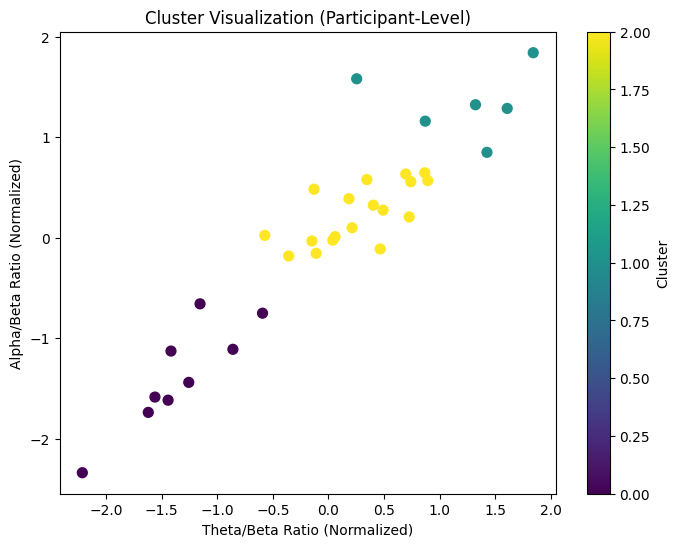

In [20]:
# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(normalized_features[:, 0], normalized_features[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('Theta/Beta Ratio (Normalized)')
plt.ylabel('Alpha/Beta Ratio (Normalized)')
plt.title('Cluster Visualization (Participant-Level)')
plt.colorbar(label='Cluster')
plt.show()